In [1]:
import numpy as np
import matplotlib.pyplot as plt

from squlearn import Executor
from squlearn.encoding_circuit import ChebyshevRx
from squlearn.observables import SummedPaulis
from squlearn.qnn import QNNRegressor, SquaredLoss
from squlearn.optimizers import Adam, SGLBO

## PQC

C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


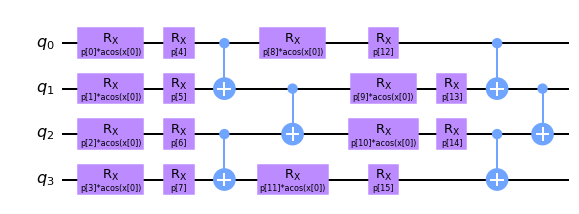

In [2]:
executor = Executor("qasm_simulator")
executor.set_shots(5000)

nqubits = 4
number_of_layers = 2

pqc = ChebyshevRx(nqubits, 1, num_layers=number_of_layers)
pqc.draw("mpl")

## Observable

In [3]:
op = SummedPaulis(nqubits)
print(op)

SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII'],
              coeffs=[ParameterExpression(1.0*p[0]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[2]), ParameterExpression(1.0*p[3]),
 ParameterExpression(1.0*p[4])])


In [4]:
def sigmoid(x, a, b, c):
    return 1 / (1 + np.exp(-a * (x - b) / c))

In [5]:
# Randomly initialize parameters of the encoding circuit
np.random.seed(13)
param_ini =  np.random.rand(pqc.num_parameters)
# Initialize parameters of the observable as ones
param_op_ini = np.random.rand(op.num_parameters)

x_train = np.arange(-1, 1.1, 0.1)
y_train = sigmoid(x_train, 5, 0, 1)

In [6]:
#x0 = [[i * 0.02] for i in range(15)]
x0 = [[1e-6], [2e-6], [1e-5], [2e-5]]
optimizer_options = {"bo_aqc_func": "EI", "bo_aqc_optimizer": "lbfgs", "bo_bounds": [(-1e-3, 0.2)], "log_file": "sglbo_sigmoid_noise_new_surrogate_avrg.log",
                     "bo_n_calls": 60, "bo_x0_points": x0, "maxiter": 300, "min_surrogate":True, "num_average":5}

qnn_simulator_sglbo = QNNRegressor(
    pqc,
    op,
    executor,
    SquaredLoss(),
    SGLBO(optimizer_options),
    param_ini,
    param_op_ini=param_op_ini,
    opt_param_op=True, 
    parameter_seed=124
)

qnn_simulator_sglbo.fit(x_train, y_train)

fit:   0%|          | 0/300 [00:00<?, ?it/s]total_shots 3990000
gradient [-1.19701703  0.0282348   0.38224668 -4.07791554 -1.23563137  0.15624257
  0.71183533 -1.21196835  5.68144733  0.30312506 -0.77103278 -4.12323289
  1.96831509  0.24896536 -0.47056432 -1.20642898 -5.09086375  0.20262642
 -0.94436129 -0.74263201 -0.15045763]
finite_diff_grad [ 6.56493269  0.71434137 -2.19923372  1.15578866 -0.40839505 -6.45150195
  4.84461075 -8.82768997  3.98751585 -4.12668682  4.8378198  -0.98321554
  2.81860032 -0.67726871 -4.59846287 -3.38155668  2.23751157 -7.23516338
 -7.27279616 -5.2382328   0.70498769]
BOP  fval:  3.686095394973169  x:  [1e-06]
BOP  fval:  3.7621598312514775  x:  [2e-06]
BOP  fval:  3.6265012001990673  x:  [1e-05]
BOP  fval:  3.7570034510428685  x:  [2e-05]
BOP  fval:  509647395.09848005  x:  [-999.9799684643789]
BOP  fval:  3636001.926690342  x:  [-81.24677582333959]
BOP  fval:  59945859.12872615  x:  [-323.6879830124062]
BOP  fval:  12.718999902171882  x:  [0.2]
BOP  fval:

C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  12.718999902171882  x:  [0.2]
BOP  fval:  12.718999902171882  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  12.718999902171882  x:  [0.2]
BOP  fval:  121763.39976744501  x:  [-14.599477796743031]
BOP  fval:  12.718999902171882  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  12.718999902171882  x:  [0.2]
BOP  fval:  2.8270343588323312  x:  [0.15341250175094956]
BOP  fval:  12.718999902171882  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  12.718999902171882  x:  [0.2]
BOP  fval:  12.718999902171882  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  12.718999902171882  x:  [0.2]
BOP  fval:  11.890677205810391  x:  [0.19774944631149083]
BOP  fval:  0.9887383632190399  x:  [0.06870774197409446]
BOP  fval:  0.6273178064753958  x:  [0.11727531140468272]
BOP  fval:  12.718999902171882  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  2.0841082994891136  x:  [0.0199386809454154]
BOP  fval:  10.825047508289638  x:  [-0.06337171103643868]
BOP  fval:  3.9577111810242553  x:  [0.16170266947017353]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  12.718999902171882  x:  [0.2]
BOP  fval:  44844.385639636326  x:  [-8.970913141990877]
BOP  fval:  0.9561183468004556  x:  [0.0728733416800651]
BOP  fval:  8.57023945954631  x:  [-0.03912536878783612]
BOP  fval:  137.41408420226696  x:  [-0.43944616172541373]
BOP  fval:  11.855972508951664  x:  [-0.08679879023372905]
BOP  fval:  7.662097590774021  x:  [-0.03332162504398184]
BOP  fval:  12.718999902171882  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  90.95602205280616  x:  [-0.3634213562086188]
BOP  fval:  1013.3978780007325  x:  [-1.3158157592476982]
BOP  fval:  1.2997279723787933  x:  [0.13597075736174702]
BOP  fval:  866.0369157685121  x:  [-1.211326204228385]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  12.718999902171882  x:  [0.2]
BOP  fval:  59.73580167042898  x:  [-0.29816648915232236]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  12.718999902171882  x:  [0.2]
BOP  fval:  0.5957510610689493  x:  [0.11117574814772979]
BOP  fval:  1182.639814566713  x:  [-1.4185247035053408]
BOP  fval:  1820.870945238726  x:  [-1.7844064683258694]
BOP  fval:  1112.6582327312326  x:  [-1.3782250533353135]
BOP  fval:  4948.130086336176  x:  [-2.9488653187106593]
BOP  fval:  122342.77678082074  x:  [-14.632407105047491]
BOP  fval:  4.384083745251497  x:  [0.16497103942731428]
BOP  fval:  3248.73228650688  x:  [-2.3842506311116267]
BOP  fval:  67343.10107279758  x:  [-11.351996179739785]
BOP  fval:  8210.31411948224  x:  [-3.8199747475307504]
BOP  fval:  18425.820505504915  x:  [-5.847556687004499]
BOP  fval:  7965.069086645019  x:  [-3.743051040795308]
BOP  fval:  2466.2602586297266  x:  [-2.0831939922084075]
BOP  fval:  20.323851018317225  x:  [-0.145134363358693]
BOP  fval:  204432.54062081437  x:  [-19.284273853212767]
BOP  fval:  179111.1771290175  x:  [-18.038443969656896]
BOP  fval:  3199.954386878818  x:  [-2.36851

C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  30.972949454053758  x:  [0.2]
BOP  fval:  30.972949454053758  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  501422.5334897912  x:  [-15.976384352906166]
BOP  fval:  30.972949454053758  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  30.972949454053758  x:  [0.2]
BOP  fval:  30.972949454053758  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  29.55349958009321  x:  [0.19700528395787842]
BOP  fval:  30.972949454053758  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  30.972949454053758  x:  [0.2]
BOP  fval:  30.972949454053758  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  13.315507640239439  x:  [0.1327269383461953]
BOP  fval:  30.972949454053758  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  30.972949454053758  x:  [0.2]
BOP  fval:  30.972949454053758  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  152.7802328374149  x:  [-0.19152790926091257]
BOP  fval:  14.598660371262147  x:  [0.14316732026475165]
BOP  fval:  18.029487944423167  x:  [0.16199556990727615]
BOP  fval:  64.07174906906005  x:  [-0.057369885812704524]
BOP  fval:  9.786635508294205  x:  [0.10991599521889839]
BOP  fval:  111.14676896967786  x:  [-0.1498112820723918]
BOP  fval:  549.2810187791048  x:  [-0.4610630571884258]
BOP  fval:  30.972949454053758  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  30.972949454053758  x:  [0.2]
BOP  fval:  12521.939967496237  x:  [-2.4368119085390845]
BOP  fval:  124.18195298895114  x:  [-0.1648156814817412]
BOP  fval:  339.41421916626666  x:  [-0.3339056923539374]
BOP  fval:  16393.60877726391  x:  [-2.800075379467671]
BOP  fval:  425.64516654937546  x:  [-0.4016206139460792]
BOP  fval:  219137.1139437916  x:  [-10.664882305256128]
BOP  fval:  1154.7256009683022  x:  [-0.6916449863512071]
BOP  fval:  1945.5337087419393  x:  [-0.9257319345009591]
BOP  fval:  175201.0405497434  x:  [-9.554379545287588]
BOP  fval:  82177.57838671432  x:  [-6.389768713979038]
BOP  fval:  23234.02713939357  x:  [-3.3523769677660766]
BOP  fval:  13.514264140448095  x:  [0.13450635891831553]
BOP  fval:  11195.84995400077  x:  [-2.3180900672911093]
BOP  fval:  1771.880434753567  x:  [-0.8807716628391518]
BOP  fval:  7221.923352648659  x:  [-1.8378123795113197]
BOP  fval:  1637.1081186437216  x:  [-0.8385125073135669]
BOP  fval:  7353.225844884169  x:  [-1.85

C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  30.972949454053758  x:  [0.2]
BOP  fval:  7.283039615928929  x:  [0.09152093539648831]
BOP  fval:  8347.101207267797  x:  [-1.977505278450849]
Start surrogate optimization with initial point:  [0.09152093539648831]
Minimum of surrogate function:  [0.2]
 Iteration:  1 :  gp_minimize:  fval:  7.283039615928929  x:  [0.2]  bounds:  [(-1000.0, 0.2)] 
total_shots 29925000
gradient [-3.54255458e+00 -5.29938626e+00 -3.99731910e+00  4.64909597e-01
 -1.98619730e-01 -1.94976022e+00 -2.96743889e+00 -7.47502014e-04
 -1.86274092e+00 -8.87665318e-01 -1.93802996e+00  3.58145826e-01
 -2.49801636e+00 -8.94159144e-01 -3.42823996e-01  8.03399992e-02
 -8.88184794e+00  4.36671477e+00 -2.52335366e+00 -1.32335146e+00
 -1.60082314e+00]
finite_diff_grad [ -2.73135599   5.21208053 -17.15320848 -14.38044169   8.65933466
  -9.94382118 -30.26832197  19.68329367  13.62537704 -17.62903117
   3.3660521  -34.17764313   0.55999129  -4.13343911  -9.6886749
   5.1945266  -58.95784791  19.83425082 -44.6002972 

C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  18.69517484703291  x:  [0.2]
BOP  fval:  18.69517484703291  x:  [0.2]
BOP  fval:  618510.6381979258  x:  [-17.103327382542943]
BOP  fval:  18.69517484703291  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  18.69517484703291  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  18.69517484703291  x:  [0.2]
BOP  fval:  18.69517484703291  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  18.69517484703291  x:  [0.2]
BOP  fval:  18.69517484703291  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  18.69517484703291  x:  [0.2]
BOP  fval:  18.69517484703291  x:  [0.2]
BOP  fval:  4.378042843363713  x:  [0.13805710904398438]
BOP  fval:  18.69517484703291  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  9.053988320392476  x:  [0.05562153952996596]
BOP  fval:  18.69517484703291  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  834.678730702247  x:  [-0.4367451476266524]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  18.69517484703291  x:  [0.2]
BOP  fval:  275.9789994764349  x:  [-0.18707814943638823]
BOP  fval:  18.69517484703291  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  3.1649601046793716  x:  [0.11936265757549336]
BOP  fval:  18.69517484703291  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  18.69517484703291  x:  [0.2]
BOP  fval:  239231.25297482905  x:  [-12.466683349456957]
BOP  fval:  501.46035231037433  x:  [-0.26767840539196186]
BOP  fval:  18.69517484703291  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  851.9799310956324  x:  [-0.537742963158621]
BOP  fval:  18.69517484703291  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  4142.379575664594  x:  [-1.1716794891642621]
BOP  fval:  40867.17509089926  x:  [-4.734752531634513]
BOP  fval:  18.69517484703291  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  9.05838240320253  x:  [0.05564815881052709]
BOP  fval:  5569.007450031548  x:  [-1.4328813184329192]
BOP  fval:  18.69517484703291  x:  [0.2]


C:\Users\DKR\AppData\Roaming\Python\Python310\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  17734.058279897843  x:  [-3.1541615537855705]
BOP  fval:  7285.71457846277  x:  [-1.698438980817059]
BOP  fval:  6077.356798518603  x:  [-1.5246843938389247]
BOP  fval:  1589.588456355522  x:  [-0.7214366960462257]
BOP  fval:  17165.616530760264  x:  [-2.9782478695900636]
BOP  fval:  720.6723300284915  x:  [-0.34600086480759273]
BOP  fval:  779.9033363115038  x:  [-0.37982863283843926]
BOP  fval:  14817.966585521737  x:  [-2.7119345588354236]
BOP  fval:  9.945948479321702  x:  [0.17187462569802392]
BOP  fval:  208.44297595839163  x:  [-0.1522422897648994]
BOP  fval:  9944.376221863798  x:  [-2.1112644594126095]
BOP  fval:  12164.150035543018  x:  [-2.4843521495679397]
BOP  fval:  12736.691840813963  x:  [-2.5488334796119716]
BOP  fval:  42052.60610459393  x:  [-4.67885072460831]
BOP  fval:  201.4978040764594  x:  [-0.1481595441287027]
BOP  fval:  3867.900416094938  x:  [-1.1268105033885831]


## predict vs. actual function